In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
transactions_file = 'Documents/MNA/ProyectoIntegrador/TransactionsUAT.csv'
categories_file = 'Documents/MNA/ProyectoIntegrador/TransactionCategoriesUAT.csv'

transactions_df = pd.read_csv(transactions_file, low_memory = False)
categories_df = pd.read_csv(categories_file)

In [13]:
print("Transactions Dataset Info")
transactions_df.info()
print("\nCategories Dataset Info")
categories_df.info()

Transactions Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277289 entries, 0 to 277288
Data columns (total 82 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ConsumerFiTransactionDetailId  277289 non-null  int64  
 1   ConsumerId                     277289 non-null  int64  
 2   FintechDetailId                7324 non-null    float64
 3   ConsumerFiAccountDetailId      277289 non-null  int64  
 4   AccountNumber                  277289 non-null  object 
 5   TransactionTypeCode            276567 non-null  object 
 6   ActivityDate                   251897 non-null  object 
 7   BalSegCount                    275841 non-null  float64
 8   BalanceChange                  277258 non-null  float64
 9   BatchSequence                  275515 non-null  float64
 10  BilledFeeAmount                275841 non-null  float64
 11  Branch                         202203 non-null  float64
 12  Tran

In [14]:
print("\nFirst few rows of Transactions Dataset")
print(transactions_df.head())
print("\nFirst few rows of Categories Dataset")
print(categories_df.head())


First few rows of Transactions Dataset
   ConsumerFiTransactionDetailId  ConsumerId  FintechDetailId  \
0                          13562        1968              0.0   
1                          13563        1968              0.0   
2                          13564        1968              0.0   
3                          13565        1968              0.0   
4                          13566        1968              0.0   

   ConsumerFiAccountDetailId                         AccountNumber  \
0                       3681  84790af8-6965-4d15-b5a2-b9af0c1a38f5   
1                       3681  84790af8-6965-4d15-b5a2-b9af0c1a38f5   
2                       3681  84790af8-6965-4d15-b5a2-b9af0c1a38f5   
3                       3681  84790af8-6965-4d15-b5a2-b9af0c1a38f5   
4                       3681  84790af8-6965-4d15-b5a2-b9af0c1a38f5   

  TransactionTypeCode             ActivityDate  BalSegCount  BalanceChange  \
0                   D  2022-08-29 00:00:00.000          0.0          2

In [9]:
print("\nSummary statistics of numerical columns in Transactions")
print(transactions_df.describe())


Summary statistics of numerical columns in Transactions
       ConsumerFiTransactionDetailId     ConsumerId  FintechDetailId  \
count                   2.772890e+05  277289.000000           7324.0   
mean                    1.295227e+06    2461.071121              0.0   
std                     6.449426e+05    1077.076378              0.0   
min                     1.356200e+04      58.000000              0.0   
25%                     7.065890e+05    1612.000000              0.0   
50%                     1.452201e+06    2241.000000              0.0   
75%                     1.818057e+06    3636.000000              0.0   
max                     2.167720e+06    4436.000000              0.0   

       ConsumerFiAccountDetailId  BalSegCount  BalanceChange  BatchSequence  \
count              277289.000000     275841.0  277258.000000  275515.000000   
mean                 8753.154128          0.0      39.330406      20.300093   
std                  7105.262711          0.0    9005.895

In [10]:
print("\nMissing values in Transactions dataset")
missing_values = transactions_df.isnull().sum()
print(missing_values[missing_values > 0])


Missing values in Transactions dataset
FintechDetailId        269965
TransactionTypeCode       722
ActivityDate            25392
BalSegCount              1448
BalanceChange              31
                        ...  
AdjustmentCode          75927
ActionCode             100945
ImportTS               178203
ExpirationDate         275678
ExpirationTime         275678
Length: 71, dtype: int64


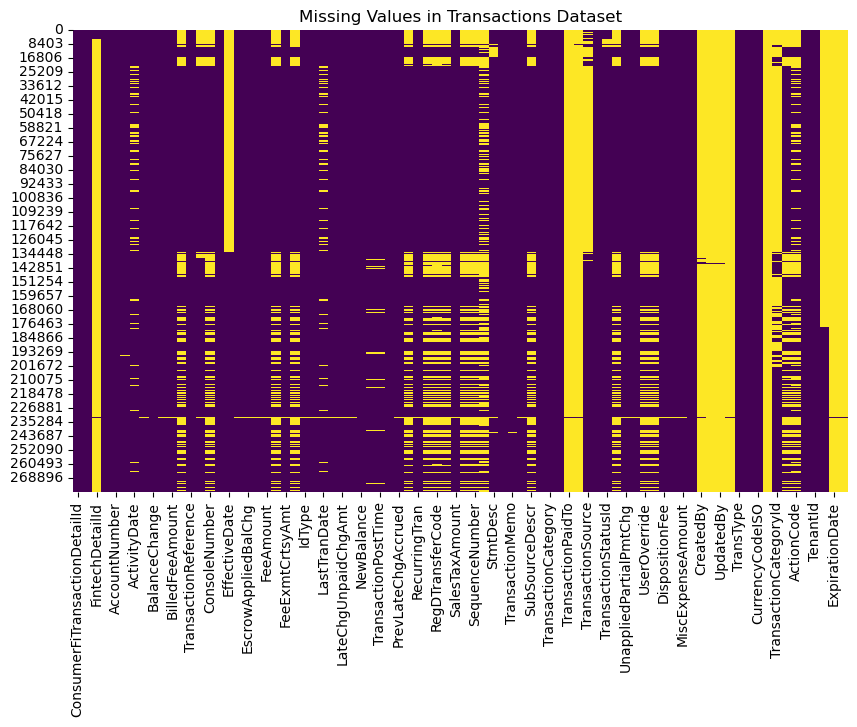

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(transactions_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Transactions Dataset")
plt.show()

Tras una junta con el equipo de producto y desarrollo se aclaró el propósito de cada columna, basado en eso y en el análisis bruto en las columnas existentes, se determinaron las columnas relevantes para el modelo:

Columnas de identificación (IDs), se decidieron eliminar, pues no son relevantes para el propósito del modelo y podrían introducir sesgos no deseados.

    ConsumerFiTransactionDetailId
    ConsumerId    
    FintechDetailId    
    ConsumerFiAccountDetailId    
    AccountNumber
    TransactionID: Identificador único de la transacción.
    AsaTransactionID: Identificador específico de Asa Financial para la transacción.

Columnas vacías o específicas al sistema (ASA):

    ConfirmationSeq: Número de secuencia que confirma la transacción, si es aplicable.
    ConsoleNumber: Identificador de la consola desde la cual se ejecutó la transacción.
    Branch: Sucursal o ubicación donde se realizó la transacción, si aplica.
    UserNumber: Número de usuario que realizó la transacción.
    AdjustmentCode: Código que indica si hubo un ajuste en la transacción.
    ProcessorUser: Usuario o sistema que procesó la transacción.
    UserOverride: Indicador de si hubo una anulación manual en la transacción por parte de un usuario.
    FeeCountBy: Método o tipo de cuenta para el cálculo de la tarifa, si aplica.
    ShareId: Identificador del tipo de participación o cuenta, en caso de cuentas de crédito compartidas.
    RegDCheckCode: Código de verificación relacionado con la regulación D, que limita transferencias de ciertos tipos de cuentas.
    RegDTransferCode: Código de transferencia según la regulación D.
    RegECode: Código relacionado con la regulación E, que cubre la protección de transacciones electrónicas.
    VoidCode: Código que indica si la transacción fue anulada.
    TenantId: Identificador del inquilino o cliente que usa el sistema.
    CreatedBy: Usuario o sistema que creó la transacción en el sistema.
    UpdatedBy: Usuario o sistema que actualizó la transacción.
    BatchSequence: Número de secuencia que identifica el lote de procesamiento de la transacción.
    TransactionReference: Referencia única asociada a la transacción.
    CreatedDate: Fecha en la que la transacción fue registrada en el sistema.
    UpdatedDate: Fecha en la que la transacción fue actualizada.
    ImportTS: Marca de tiempo que indica cuándo se importó la transacción al sistema.
    IdType: Tipo de identificación usada para verificar la transacción (e.g., número de ID).
    BilledFeeAmount: Monto de la comisión facturada en la transacción.


Columnas para casos especificos y particulares de transacciones que no son relevantes para el modelo:
    
    BalSegCount: Cuenta o número de segmentos del balance afectado por la transacción.
    EscrowAmount: Monto relacionado con un depósito en una cuenta de plica (escrow).
    EscrowAppliedBalChg: Cambio en el balance aplicado a la cuenta de escrow.
    EscrowUnpaidBalChg: Cambio en el balance no pagado en la cuenta de escrow.
    FeeExmtCrtsyAmt: Monto de tarifa exento por cortesía en la transacción.
    Interest: Intereses generados o cobrados en la cuenta relacionada con la transacción.
    LastTranDate: Fecha de la última transacción realizada en la cuenta.
    LateChgFieldsValid: Indicador de si los cargos por morosidad están validados o no.
    LateChgUnpaidChgAmt: Monto no pagado de cargos por morosidad.
    LateChgWaivedAmt: Monto de cargos por morosidad que fue eximido.
    PrevAvailBalance: Balance disponible anterior a la transacción.
    PrevLateChgAccrued: Cargos por morosidad acumulados antes de la transacción.
    SalesTaxAmount: Monto de impuestos sobre ventas aplicado a la transacción.
    SecurityLevels: Niveles de seguridad asociados a la transacción.
    SequenceNumber: Número de secuencia que identifica la transacción en un lote.
    SubSource: Subcategoría que define el origen específico de la transacción.
    SubSourceDescr: Descripción detallada de la subcategoría de la transacción.
    TransactionPaidTo: Nombre o entidad a la que se pagó con la transacción.
    TransactionReceivedFrom: Nombre o entidad de la cual se recibió el pago.
    TransactionSource: Fuente desde la cual se originó la transacción.
    UnappliedPartialPmtChg: Cargo por pagos parciales no aplicados.
    DispositionFee: Comisión aplicada por la disposición o liquidación de fondos.
    TerminationFee: Comisión cobrada por la terminación anticipada de un servicio o contrato.
    MiscExpenseAmount: Monto de gastos diversos aplicados a la transacción.
    IsIgnoredTransaction: Indicador de si la transacción fue ignorada o no.
    CurrencyCodeUnOfficial: Código de moneda no oficial usado en la transacción. Todas son USD, no se necesita.
    CurrencyCodeISO: Código de moneda oficial basado en el estándar ISO.
    DirectTransactionID: Identificador directo para rastrear la transacción relacionada.
    ExpirationDate: Fecha de vencimiento asociada a la transacción.
    ExpirationTime: Hora de vencimiento asociada a la transacción.
    RecurringTran: Indicador de si la transacción es recurrente o no.
    SourceCode: Código que indica el origen de la transacción.
    EntryId: Identificador de la entrada específica en el sistema contable.
    TransactionStatusId: Identificador del estado actual de la transacción (e.g., completada, pendiente).
    TransferCode: Código que indica el tipo de transferencia realizada.


Columnas duplicadas con otras útiles:
    
    TransactionTypeId: Identificador que categoriza el tipo de transacción.
    TransactionTypeCode: Código que clasifica el tipo de transacción (e.g., depósito, retiro).  
    TransactionCategoryId: Identificador de la categoría a la que pertenece la transacción.


Columnas Utiles:
    
    ActivityDate: Fecha en la que se realizó la transacción.
    BalanceChange: Cambio en el balance de la cuenta después de la transacción.
    TransactionDescription: Descripción de la transacción, a menudo proporcionada por el banco.
    EffectiveDate: Fecha en la que la transacción fue efectivamente registrada en el sistema.
    FeeAmount: Monto de la tarifa aplicada a la transacción.
    NewBalance: Nuevo balance de la cuenta después de la transacción.
    TransactionPostDate: Fecha en la que se contabilizó la transacción en el sistema.
    TransactionPostTime: Hora en la que se contabilizó la transacción en el sistema.
    StmtDesc: Descripción que aparece en el estado de cuenta del consumidor.
    TransactionMemo: Notas o memorandos adicionales acerca de la transacción.
    TransactionAmount: Monto total de la transacción.
    TransactionCategory: Categoría a la que pertenece la transacción (e.g., entretenimiento, comida).
    TransType: Tipo de transacción, categorizada de manera más amplia.
    ActionCode: Código de acción asociado a la transacción.


In [121]:
columns_to_keep = [
    'ActivityDate', 'BalanceChange', 'TransactionDescription', 'EffectiveDate',
    'FeeAmount', 'NewBalance', 'TransactionPostDate', 'TransactionPostTime',
    'StmtDesc', 'TransactionMemo', 'TransactionAmount', 'TransactionCategory',
    'TransType', 'ActionCode'
]

filtered_df = transactions_df[columns_to_keep]

print(transactions_df.head())

              ActivityDate  BalanceChange TransactionDescription  \
0  2022-08-29 00:00:00.000          24.46             Albertsons   
1  2022-08-29 00:00:00.000          65.00          Quantum Fiber   
2  2022-08-25 00:00:00.000         465.01              NV Energy   
3  2022-08-22 00:00:00.000          21.00              Atlassian   
4  2022-08-19 00:00:00.000         233.02                 Costco   

  EffectiveDate  FeeAmount  NewBalance TransactionPostDate  \
0           NaN        0.0         0.0          2022-08-29   
1           NaN        0.0         0.0          2022-08-29   
2           NaN        0.0         0.0          2022-08-25   
3           NaN        0.0         0.0          2022-08-22   
4           NaN        0.0         0.0          2022-08-19   

  TransactionPostTime                                           StmtDesc  \
0    12:00:00.0000000  PURCHASE                                AUTHOR...   
1    12:00:00.0000000  PURCHASE                                AUT

In [102]:
missing_values = filtered_df.isnull().sum()
missing_percentage = (filtered_df.isnull().mean() * 100)

print("Valores faltantes por columna:")
print(missing_values)
print("\nPorcentaje de valores faltantes por columna:")
print(missing_percentage)

Valores faltantes por columna:
ActivityDate               25392
BalanceChange                 31
TransactionDescription       296
EffectiveDate             132796
FeeAmount                   1448
NewBalance                    31
TransactionPostDate         8187
TransactionPostTime         8175
StmtDesc                    8169
TransactionMemo               32
TransactionAmount              0
TransactionCategory           12
TransType                     31
ActionCode                100945
dtype: int64

Porcentaje de valores faltantes por columna:
ActivityDate               9.157233
BalanceChange              0.011180
TransactionDescription     0.106748
EffectiveDate             47.890829
FeeAmount                  0.522199
NewBalance                 0.011180
TransactionPostDate        2.952515
TransactionPostTime        2.948188
StmtDesc                   2.946024
TransactionMemo            0.011540
TransactionAmount          0.000000
TransactionCategory        0.004328
TransType       

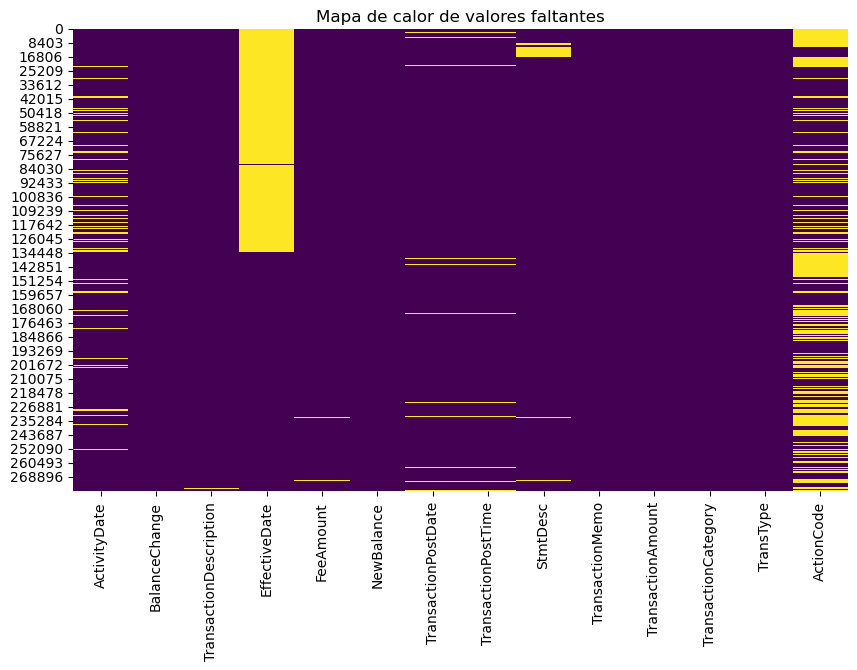

In [103]:
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores faltantes")
plt.show()

Basado en los resultados del análisis de datos faltantes,

Para las columnas con más datos faltantes:

1. Eliminar Efective Date, pues falta casi la mitad de los datos y se cuenta con otras fechas valiosas como Activity Date.
2. Action Code carece del 36% de los datos, pero al solo tener dos valores posibles se buscará ser imputada basado en su TransactionTypeCode y Transaction Category
3. Activity Date carece del 9.15% de sus datos, buscará ser imputada por medio de su TransactionPostDate.

Para las columnas con menos datos faltantes:

1. TransactionPostDate (2.95%) y TransactionPostTime (2.94%): Se buscará imputar los valores faltantes si se cuenta con información de fechas cercanas (ActivityDate).
2. StmtDesc (2.94%): Se imputará con la palabra "Unknown".
3. FeeAmount (0.52%): Los valores faltantes se imputarán usando la mediana o media de los valores de FeeAmount dentro de categorías similares (TransactionCategory).
4. BalanceChange y NewBalance (0.01%): Dado que los faltantes son pocos, se eliminarán los registros faltantes.
5. TransactionDescription (0.11%): Dado que los faltantes son pocos, se eliminarán los registros faltantes.

In [122]:
# Imputar 'ActionCode' basado únicamente en 'TransactionCategory'
filtered_df['ActionCode'].fillna(
    filtered_df.groupby('TransactionCategory')['ActionCode']
    .transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'), inplace=True)

# Imputar 'ActivityDate' basado en 'TransactionPostDate'
filtered_df['ActivityDate'].fillna(filtered_df['TransactionPostDate'], inplace=True)

# Imputar 'TransactionPostDate' y 'TransactionPostTime' basado en 'ActivityDate'
filtered_df['TransactionPostDate'].fillna(filtered_df['ActivityDate'], inplace=True)
filtered_df['TransactionPostTime'].fillna('Unknown', inplace=True)

# Imputar 'StmtDesc' con la palabra "Unknown"
filtered_df['StmtDesc'].fillna('Unknown', inplace=True)

# Imputar 'FeeAmount' usando la mediana dentro de cada 'TransactionCategory'
filtered_df['FeeAmount'].fillna(filtered_df.groupby('TransactionCategory')['FeeAmount'].transform('median'), inplace=True)

# Eliminar registros con valores faltantes en 'BalanceChange', 'NewBalance', y 'TransactionDescription'
filtered_df.dropna(subset=['BalanceChange', 'NewBalance', 'TransactionDescription'], inplace=True)

# Eliminar la columna 'EffectiveDate'
filtered_df.drop(columns=['EffectiveDate'], inplace=True)

In [105]:
missing_after_processing = filtered_df.isnull().sum()

print("Valores faltantes después del preprocesamiento:")
print(missing_after_processing)

Valores faltantes después del preprocesamiento:
ActivityDate              0
BalanceChange             0
TransactionDescription    0
FeeAmount                 0
NewBalance                0
TransactionPostDate       0
TransactionPostTime       0
StmtDesc                  0
TransactionMemo           4
TransactionAmount         0
TransactionCategory       3
TransType                 0
ActionCode                0
dtype: int64


In [123]:
# Eliminar filas con valores faltantes restantes
filtered_df.dropna(inplace=True)

# Verificar si quedan valores faltantes después de eliminar esas filas
final_missing_values = filtered_df.isnull().sum()

# Mostrar el estado final de los valores faltantes
print("Valores faltantes después de eliminar filas restantes:")
print(final_missing_values)

Valores faltantes después de eliminar filas restantes:
ActivityDate              0
BalanceChange             0
TransactionDescription    0
FeeAmount                 0
NewBalance                0
TransactionPostDate       0
TransactionPostTime       0
StmtDesc                  0
TransactionMemo           0
TransactionAmount         0
TransactionCategory       0
TransType                 0
ActionCode                0
dtype: int64


In [30]:
# Obtener estadísticas resumidas de las columnas numéricas
print("\nEstadísticas resumidas de las columnas numéricas:")
print(filtered_df.describe())

# Obtener estadísticas para las columnas categóricas
print("\nEstadísticas resumidas de las columnas categóricas:")
print(filtered_df.describe(include=['object']))


Estadísticas resumidas de las columnas numéricas:
       BalanceChange      FeeAmount     NewBalance  TransactionAmount
count  276955.000000  276955.000000  276955.000000      276955.000000
mean       39.381804       1.825141    2321.085263         813.936381
std      9010.776586     255.594625    7778.837496        8974.026454
min   -490273.410000       0.000000   -3636.890000      -16701.400000
25%      -115.000000       0.000000       0.000000           2.690000
50%        -1.700000       0.000000     391.110000          76.200000
75%        10.750000       0.000000    2501.950000         367.650000
max    490273.410000   54049.170000  497586.820000      490273.410000

Estadísticas resumidas de las columnas categóricas:
                   ActivityDate TransactionDescription TransactionPostDate  \
count                    276955                 276955              276955   
unique                     3225                   4994                2602   
top     2010-04-24 00:00:00.000 

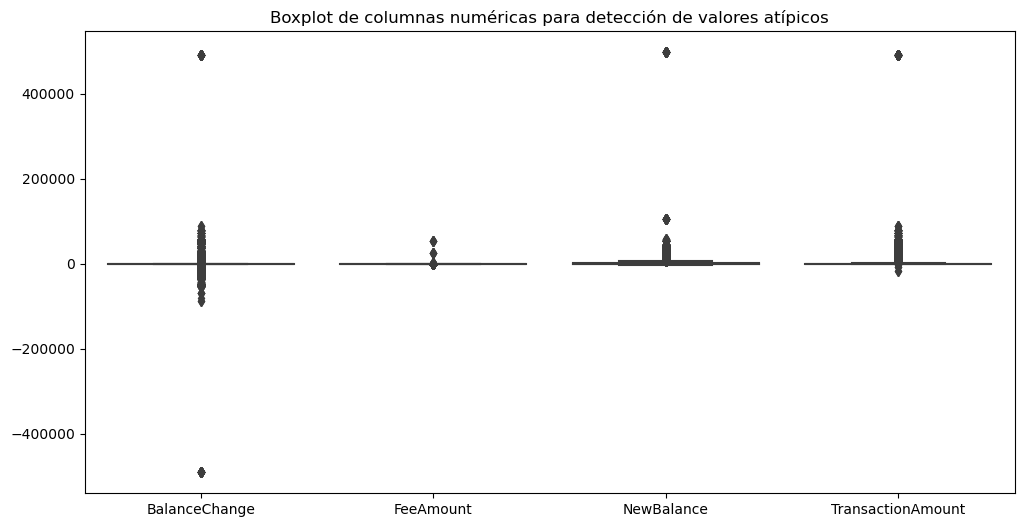

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para detectar outliers en columnas numéricas
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df[['BalanceChange', 'FeeAmount', 'NewBalance', 'TransactionAmount']])
plt.title("Boxplot de columnas numéricas para detección de valores atípicos")
plt.show()


In [32]:
categorical_columns = ['TransactionDescription', 'StmtDesc', 'TransactionCategory', 'TransType', 'ActionCode']

# Cardinalidad de las variables categóricas
for col in categorical_columns:
    print(f"Cardinalidad de {col}: {filtered_df[col].nunique()} valores únicos")


Cardinalidad de TransactionDescription: 4994 valores únicos
Cardinalidad de StmtDesc: 11239 valores únicos
Cardinalidad de TransactionCategory: 97 valores únicos
Cardinalidad de TransType: 2 valores únicos
Cardinalidad de ActionCode: 3 valores únicos


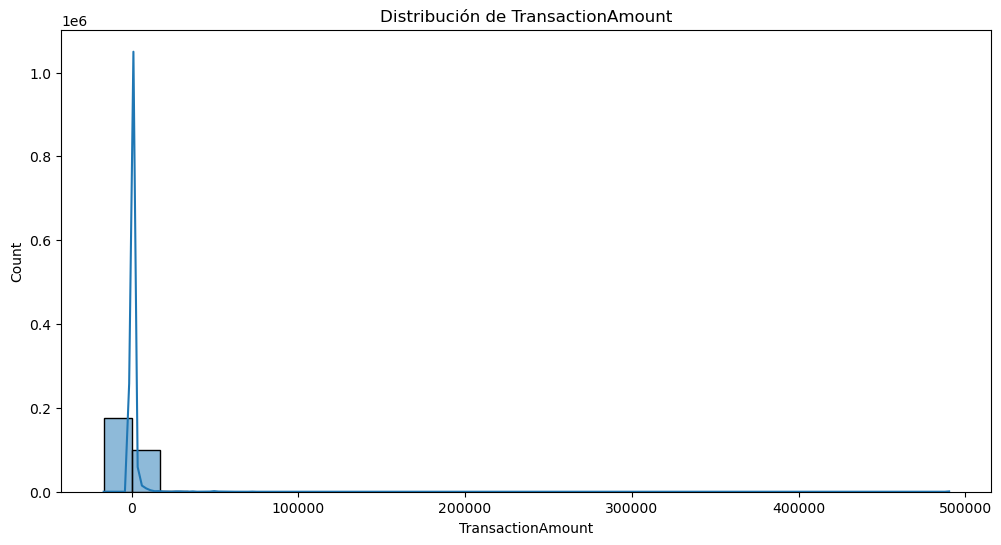

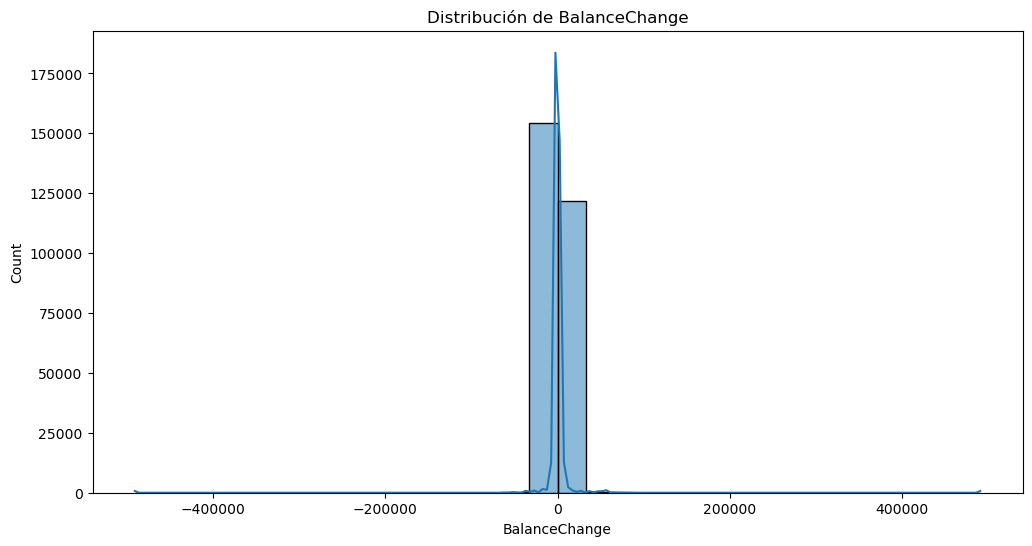

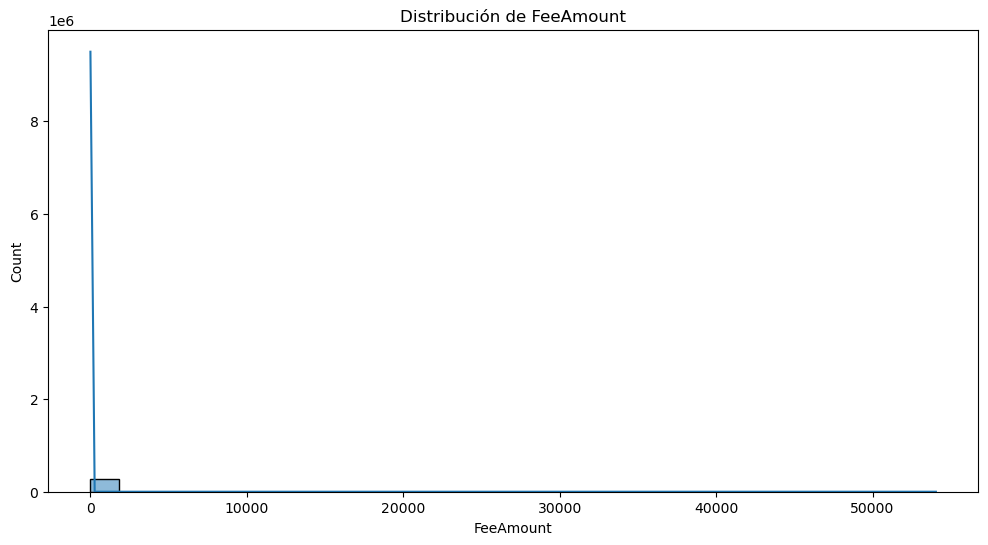

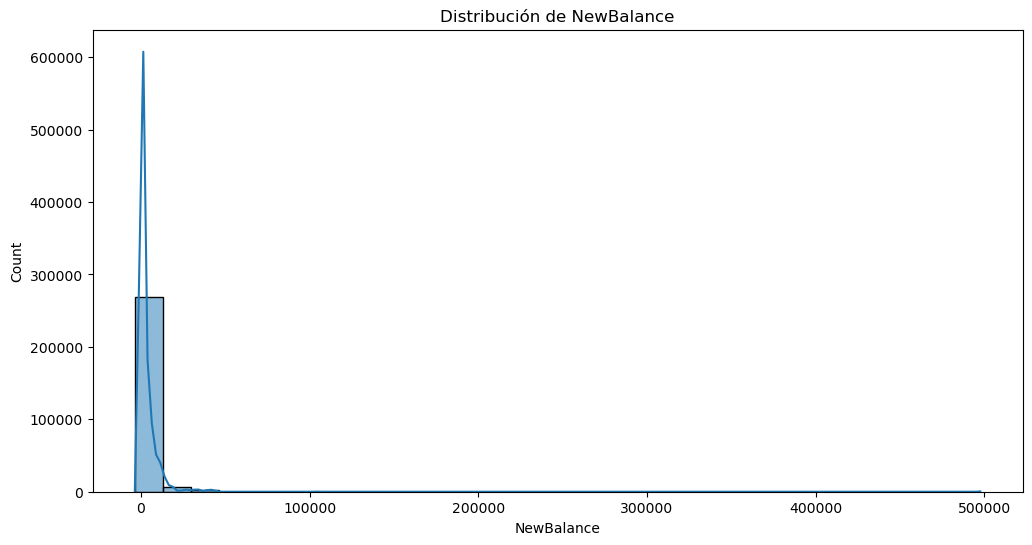

In [33]:
# Distribución de la columna TransactionAmount
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['TransactionAmount'], bins=30, kde=True)
plt.title("Distribución de TransactionAmount")
plt.show()

# Distribuciones de otras variables numéricas
for col in ['BalanceChange', 'FeeAmount', 'NewBalance']:
    plt.figure(figsize=(12, 6))
    sns.histplot(filtered_df[col], bins=30, kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

Análisis de las estadísticas resumidas:

1. BalanceChange:
Media: $39.38 indica que la mayoría de los cambios en el balance son pequeños, pero la alta desviación estándar (9010.77) sugiere que hay transacciones con cambios en el balance extremadamente altos por valores atípicos.
Valores mínimos/máximos: Va desde -490,273 a +490,273, lo que indica que algunas transacciones tienen un impacto masivo en el balance.
Mediana (50%): -1.7, lo que sugiere que la mayoría de los balances no cambian o cambian muy ligeramente en valor negativo.

2. FeeAmount:
Media: 1.83, pero la mediana es 0, lo que indica que la mayoría de las transacciones no tienen tarifas asociadas.
Valores máximos: El máximo de 54,049 sugiere que hay algunas tarifas muy elevadas que podrían ser casos extremos.
Desviación estándar: 255.59, mucho mayor que la media, lo que indica la presencia de tarifas muy inusuales en algunos registros.

3. NewBalance:
Media: 2,321.08, pero nuevamente, la desviación estándar es muy alta (7,778.84), lo que sugiere balances muy variables.
Valores extremos: El balance mínimo es -3,636, lo que podría indicar cuentas sobregiradas, y el máximo es 497,586, lo que sugiere cuentas con grandes depósitos.
Mediana: 391.11, indicando que la mayoría de las cuentas tienen balances relativamente bajos en comparación con el promedio.

4. TransactionAmount:
Media: 813.93, pero con una alta desviación estándar (8,974.02), lo que sugiere que la mayoría de las transacciones son significativamente más pequeñas que el promedio, con algunas transacciones muy grandes que elevan la media.
Valores negativos: El mínimo de -16,701.40 sugiere devoluciones o retiradas importantes.
Mediana: 76.20, indica que la mayoría de las transacciones son pequeñas, mientras que algunas transacciones grandes están distorsionando la media.

Análisis de las columnas categóricas:

1. ActivityDate y TransactionPostDate:
Existen 3,225 fechas únicas en ActivityDate y 2,602 fechas únicas en TransactionPostDate. La mayoría de las transacciones parecen concentrarse en fechas particulares (por ejemplo, el 24 de abril de 2010 tiene una frecuencia significativa).
Podría haber tendencias temporales relevantes que expliquen comportamientos de gasto.

2. TransactionDescription:
4,994 descripciones únicas, lo que indica una gran diversidad de transacciones.
La descripción más frecuente es vacía, lo que sugiere que es necesario un preprocesamiento adicional para mejorar el entendimiento de las transacciones.

3. StmtDesc y TransactionMemo:
Aunque tienen muchos valores únicos (11,239 y 15,214, respectivamente), ambas columnas tienen una descripción más frecuente asociada a un payroll ("1Deposit FEFCU Payroll"). Esto podría indicar que un porcentaje significativo de las transacciones están relacionadas con depósitos automáticos de nómina.

4. TransactionCategory:
97 categorías únicas; la categoría más frecuente es "General", lo que sugiere que muchas transacciones no tienen una clasificación específica. Este campo probablemente necesitaría ser refinado en el futuro, especialmente si algunas categorías como "General" son demasiado amplias.

5. TransType:
Solo dos tipos: "Debit" y "Credit". La mayoría de las transacciones son "Debit" (165,054), lo que sugiere que las transacciones de débito son más comunes.

6. ActionCode:
Tres valores posibles: "W" (Retiro), "D" (Depósito) y algún otro valor.
La mayoría de las transacciones son retiros (W), lo que puede ser importante al analizar los patrones de gasto o flujo de dinero.

In [38]:
# Calcular la correlación entre las variables numéricas
correlation_matrix = filtered_df[['BalanceChange', 'FeeAmount', 'NewBalance', 'TransactionAmount']].corr()
print("Matriz de correlación entre variables numéricas:")
print(correlation_matrix)

Matriz de correlación entre variables numéricas:
                   BalanceChange  FeeAmount  NewBalance  TransactionAmount
BalanceChange           1.000000   0.028204    0.513602           0.039661
FeeAmount               0.028204   1.000000   -0.002131           0.027835
NewBalance              0.513602  -0.002131    1.000000           0.528834
TransactionAmount       0.039661   0.027835    0.528834           1.000000


In [124]:
# Convertir las fechas a datetime si aún no lo has hecho
filtered_df['ActivityDate'] = pd.to_datetime(filtered_df['ActivityDate'], errors='coerce')
filtered_df['TransactionPostDate'] = pd.to_datetime(filtered_df['TransactionPostDate'], errors='coerce')

# Crear una columna para agrupar por mes/año
filtered_df['MonthYear'] = filtered_df['ActivityDate'].dt.to_period('M')

# Agrupar por mes y calcular el monto total de las transacciones
monthly_trend = filtered_df.groupby('MonthYear')['TransactionAmount'].sum()

print("Tendencias mensuales en el monto de transacciones:")
print(monthly_trend.tail(50))  # Mostrar los primeros 12 meses


Tendencias mensuales en el monto de transacciones:
MonthYear
2020-08      840596.41
2020-09      781884.37
2020-10      684832.36
2020-11      567953.78
2020-12      516490.65
2021-01      830181.36
2021-02     1739610.63
2021-03    40895113.03
2021-04      759544.61
2021-05      620140.48
2021-06      573699.03
2021-07      625597.31
2021-08      538132.34
2021-09     1060307.26
2021-10      620781.05
2021-11      869808.71
2021-12     3082870.73
2022-01      496731.27
2022-02      823136.84
2022-03     1743861.73
2022-04     2329841.04
2022-05     2565480.69
2022-06     2173480.94
2022-07     2777924.84
2022-08     2683483.38
2022-09     2873761.26
2022-10     1708643.58
2022-11     1874076.09
2022-12     4447311.68
2023-01     2079537.46
2023-02     2088758.93
2023-03     3080364.89
2023-04     1886090.53
2023-05     2676659.74
2023-06     2604552.65
2023-07     2999376.78
2023-08     2452854.16
2023-09     3001151.78
2023-10     2374140.50
2023-11     2831179.02
2023-12     3963471

In [125]:
# Calcular la distribución porcentual de las categorías
category_distribution = filtered_df['TransactionCategory'].value_counts(normalize=True) * 100

print("Distribución de las transacciones según la categoría (Top 10):")
print(category_distribution.head(10))


Distribución de las transacciones según la categoría (Top 10):
General                            63.175967
Uncategorized                      16.966294
Transfer/Transfer                   3.683992
Investments/Investments             1.449333
Shopping/Shopping                   1.218971
Shopping/Electronics & Software     1.209222
Uncategorized/Check                 0.979220
Auto & Transport/Gas                0.945641
Transfer/Credit Card Payment        0.937336
Uncategorized/Uncategorized         0.910617
Name: TransactionCategory, dtype: float64


In [126]:
# Calcular el porcentaje de transacciones sin categoría clara
uncategorized_percentage = filtered_df[filtered_df['TransactionCategory'].isin(['Uncategorized'])].shape[0] / filtered_df.shape[0] * 100

print(f"Porcentaje de transacciones sin categoría clara (Uncategorized): {uncategorized_percentage:.2f}%")


Porcentaje de transacciones sin categoría clara (Uncategorized): 16.97%


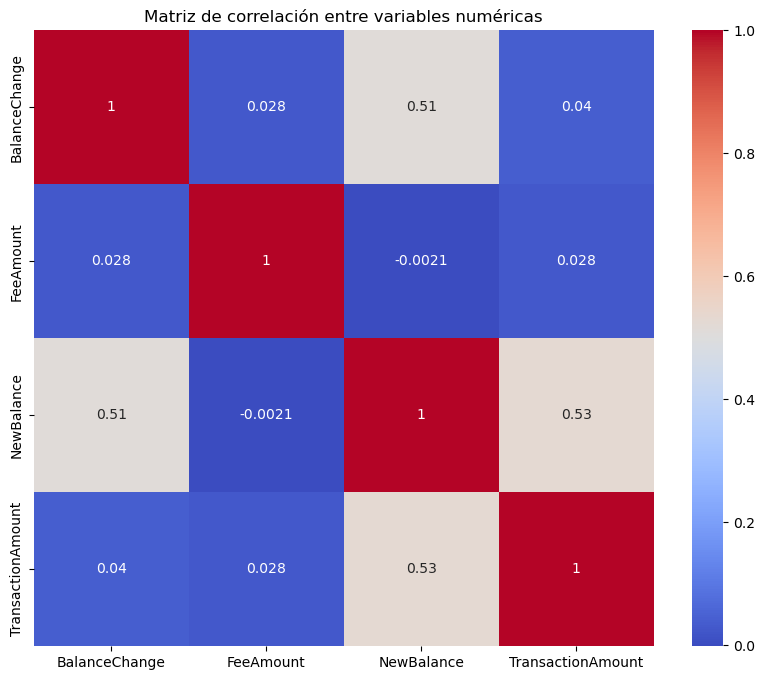

In [34]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = filtered_df[['BalanceChange', 'FeeAmount', 'NewBalance', 'TransactionAmount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

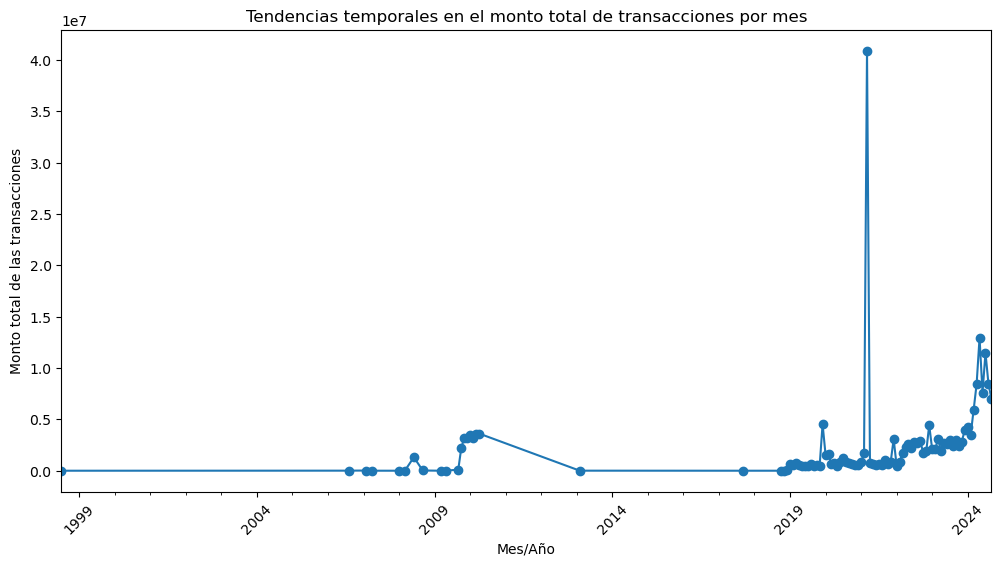

In [127]:
# Convertir columnas de fecha a formato datetime
filtered_df['ActivityDate'] = pd.to_datetime(filtered_df['ActivityDate'], errors='coerce')
filtered_df['TransactionPostDate'] = pd.to_datetime(filtered_df['TransactionPostDate'], errors='coerce')

# Agregar una columna de mes/año para analizar tendencias
filtered_df['MonthYear'] = filtered_df['ActivityDate'].dt.to_period('M')

# Analizar tendencias temporales en el monto total de transacciones por mes
monthly_trend = filtered_df.groupby('MonthYear')['TransactionAmount'].sum()

plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o')
plt.title("Tendencias temporales en el monto total de transacciones por mes")
plt.ylabel("Monto total de las transacciones")
plt.xlabel("Mes/Año")
plt.xticks(rotation=45)
plt.show()


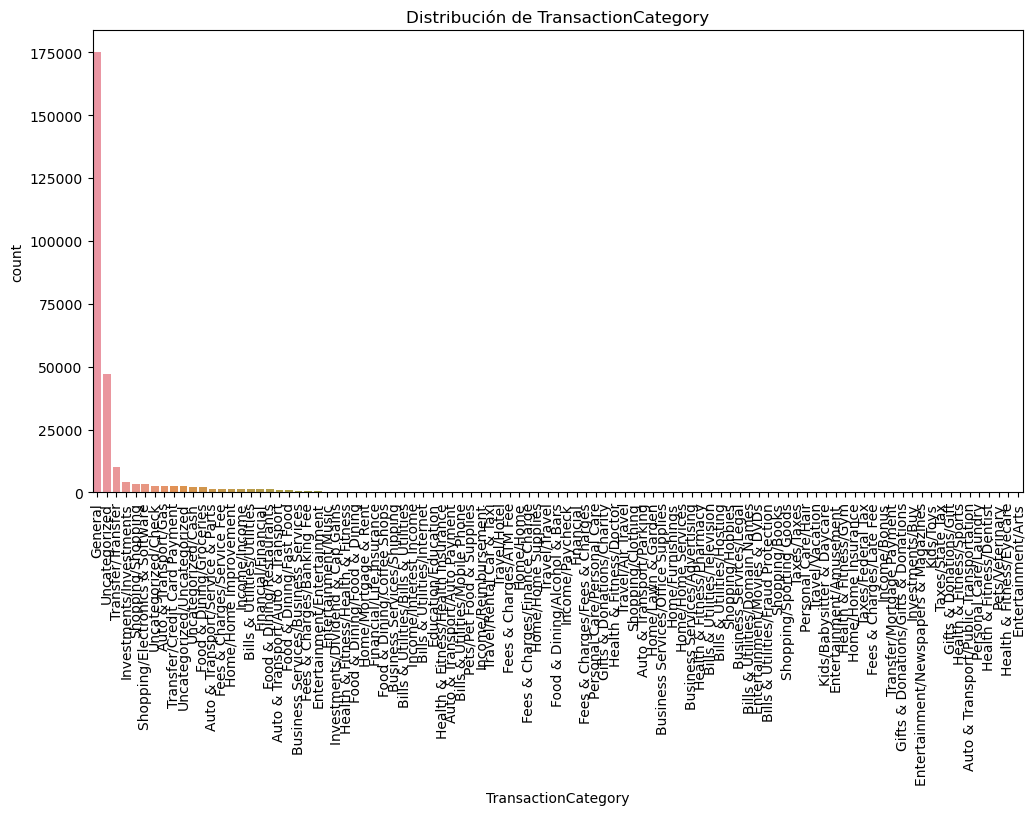

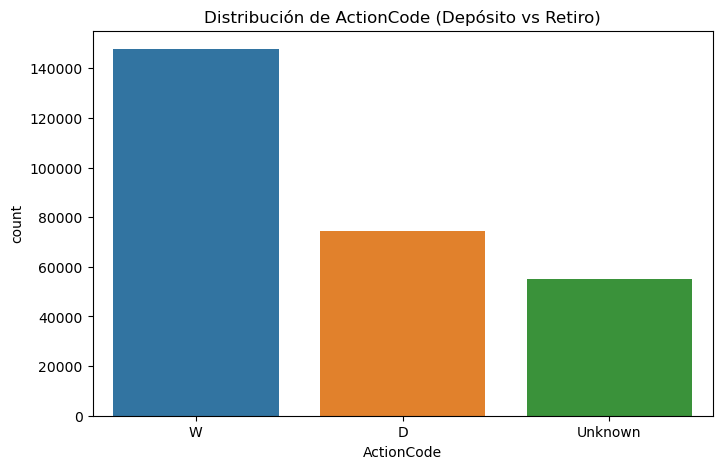

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='TransactionCategory', order=filtered_df['TransactionCategory'].value_counts().index)
plt.title("Distribución de TransactionCategory")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=filtered_df, x='ActionCode')
plt.title("Distribución de ActionCode (Depósito vs Retiro)")
plt.show()


Análisis de los resultados:

1. Matriz de correlación entre variables numéricas:
BalanceChange y NewBalance tienen una correlación moderadamente positiva (0.51), lo que indica que los cambios en el balance están asociados con el saldo final de la cuenta.
TransactionAmount y NewBalance también tienen una correlación positiva notable (0.53), lo que sugiere que los montos de las transacciones impactan significativamente en los nuevos saldos.
FeeAmount no parece tener una fuerte correlación con ninguna otra variable, lo que indica que las comisiones no están fuertemente relacionadas con los montos o los balances.

2. Tendencias mensuales en el monto total de transacciones:
Se observan grandes picos en las transacciones mensuales, especialmente en marzo de 2021, que registra más de 40 millones en transacciones. Estos grandes picos en ciertos meses pueden estar relacionados con eventos específicos, como cierres fiscales, pagos anuales, u otros eventos financieros masivos.
En 2024, el monto total de las transacciones sigue en ascenso, alcanzando su punto más alto en mayo de 2024 con más de 12 millones. Esta tendencia indica un aumento continuo en la actividad transaccional. A confirmar con el equipo por posible crecimiento exponencial de usuarios en el sistema.

3. Distribución de las transacciones según la categoría (Top 10):
General (63.18%) y Uncategorized (16.97%) dominan las transacciones, lo que implica que una gran cantidad de transacciones no están bien clasificadas. Esto es una oportunidad clara para mejorar el etiquetado de las transacciones con el modelo.
Las otras categorías tienen una representación mucho menor, lo que indica que las transacciones clasificadas están distribuidas en categorías más específicas, pero constituyen una parte relativamente pequeña del total.

4. Porcentaje de transacciones sin categoría clara:
80.14% de las transacciones están clasificadas como "General" o "Uncategorized". Esto representa un desafío importante, ya que la mayoría de las transacciones no tienen una clasificación precisa. El objetivo del modelo será mejorar esta clasificación, asignando categorías más específicas a estas transacciones.

Conclusiones:
La correlación entre montos de transacción, cambios de balance, y nuevos saldos muestra relaciones importantes que pueden ser útiles para predecir categorías o entender cómo impactan las transacciones en las cuentas.
Existen picos en la actividad mensual de transacciones, lo que podría señalar la necesidad de un análisis más detallado sobre los eventos que causan este aumento en la actividad.
Dado que más del 80% de las transacciones están categorizadas como "General" o "Uncategorized", existe una oportunidad clara para aplicar modelos predictivos que ayuden a mejorar la clasificación de transacciones.

----



AVANCE 2. INGENIERIA DE CARACTERISTICAS



----

1. Generación de nuevas características para datos temporales:

Dado que las fechas mostraron tener un impacto posiblemente significativo en las transacciones (especialmente en picos de actividad), se crearán nuevas características basadas en las fechas: mes, día de la semana, y si es un fin de semana.
Se tiene la teoría de que las transacciones podrían seguir patrones semanales o mensuales, y los días de fin de semana pueden ser diferentes en términos de comportamiento del usuario.

In [128]:
filtered_df['TransactionMonth'] = filtered_df['ActivityDate'].dt.month
filtered_df['TransactionDayOfWeek'] = filtered_df['ActivityDate'].dt.dayofweek
filtered_df['IsWeekend'] = filtered_df['ActivityDate'].dt.dayofweek >= 5  # 5 y 6 son sábado y domingo

2. One-Hot Encoding para variables categóricas con baja cardinalidad:

Las variables ActionCode y TransType tienen pocos valores únicos, por lo que se decidió que One-Hot Encoding es adecuado para evitar la asignación ordinal de categorías.

In [129]:
filtered_df = pd.get_dummies(filtered_df, columns=['ActionCode', 'TransType'], drop_first=True)

3. Transformación logarítmica para reducir el impacto de outliers:

Dado que se encontró que los montos de las transacciones y los cambios de balance tienen outliers significativos, se decidió aplicar una transformación logarítmica a estas columnas.
La transformación logarítmica ayuda a reducir el impacto de los valores extremos, se espera que esto permita que el modelo aprenda de manera más eficiente en presencia de estos outliers.

In [130]:
import numpy as np

filtered_df['LogTransactionAmount'] = filtered_df['TransactionAmount'].apply(lambda x: np.log(x + 1) if x > 0 else 0)
filtered_df['LogFeeAmount'] = filtered_df['FeeAmount'].apply(lambda x: np.log(x + 1) if x > 0 else 0)
filtered_df['LogBalanceChange'] = filtered_df['BalanceChange'].apply(lambda x: np.log(x + 1) if x > 0 else 0)

4. Escalamiento para features numéricos:

Para columnas numéricas como BalanceChange, FeeAmount, NewBalance, y TransactionAmount, se decidió normalizarlas para reducir la influencia de las diferentes escalas que se tienen, para esto se optó por la normalización Min-Max.
Se considera que esta normalización es esencial para que los modelos que dependen de la distancia como SVM o KNN funcionen correctamente.

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
filtered_df[['BalanceChange', 'FeeAmount', 'NewBalance', 'TransactionAmount']] = scaler.fit_transform(
    filtered_df[['BalanceChange', 'FeeAmount', 'NewBalance', 'TransactionAmount']])

5. Selección de características por su correlación:

Se utilizará la matriz de correlación para eliminar características altamente correlacionadas y reducir la multicolinealidad. Esto se decidió como protección para que características que están altamente correlacionadas no afecten y se reduzca el riesgo de multicolinealidad, que podría dificultar la interpretación del modelo.

In [131]:
correlation_matrix = filtered_df.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

filtered_df.drop(columns=to_drop, inplace=True)

C:\Users\Zuriel\AppData\Local\Temp\ipykernel_19844\3704440009.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_df.corr().abs()


6. Selección de características por umbral de varianza:

Se decidió eliminar características que tengan una baja varianza, lo que indicaría que no van a aportar mucha información al modelo, esto para reducir el ruido introducido y aligerar la carga de datos.

In [132]:
from sklearn.feature_selection import VarianceThreshold

numeric_columns = filtered_df.select_dtypes(include=[np.number])

selector = VarianceThreshold(threshold=0.01)
filtered_df_reduced = selector.fit_transform(numeric_columns)

remaining_columns = numeric_columns.columns[selector.get_support()]
print("Columnas restantes después de aplicar VarianceThreshold:", remaining_columns)


Columnas restantes después de aplicar VarianceThreshold: Index(['BalanceChange', 'FeeAmount', 'NewBalance', 'TransactionAmount',
       'TransactionMonth', 'TransactionDayOfWeek', 'ActionCode_Unknown',
       'ActionCode_W', 'TransType_Debit', 'LogTransactionAmount',
       'LogFeeAmount', 'LogBalanceChange'],
      dtype='object')


7. Análisis de Componentes Principales (PCA):

Se realizará un análisis de componentes principales para reducir la dimensionalidad de las características en caso de ser necesario.
Esto se considera útil para reducir la complejidad del modelo y mantener solo las características más importantes, lo que puede acelerar el entrenamiento del modelo.

In [147]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
pca_transformed = pca.fit_transform(filtered_df.select_dtypes(include=[np.number]))

print(f"Varianza explicada por los componentes: {pca.explained_variance_ratio_}")

Varianza explicada por los componentes: [0.56310333 0.34936482 0.08723886]


In [148]:
filtered_df.head()

,ActivityDate,BalanceChange,TransactionDescription,FeeAmount,NewBalance,TransactionPostDate,TransactionPostTime,StmtDesc,TransactionMemo,TransactionAmount,...,MonthYear,TransactionMonth,TransactionDayOfWeek,IsWeekend,ActionCode_Unknown,ActionCode_W,TransType_Debit,LogTransactionAmount,LogFeeAmount,LogBalanceChange
0,2022-08-29,24.46,Albertsons,0.0,0.0,2022-08-29,12:00:00.0000000,PURCHASE AUTHOR...,PURCHASE AUTHOR...,24.46,...,2022-08,8,0,False,0,1,1,3.237109,0.0,3.237109
1,2022-08-29,65.00,Quantum Fiber,0.0,0.0,2022-08-29,12:00:00.0000000,PURCHASE AUTHOR...,PURCHASE AUTHOR...,65.00,...,2022-08,8,0,False,0,1,1,4.189655,0.0,4.189655
2,2022-08-25,465.01,NV Energy,0.0,0.0,2022-08-25,12:00:00.0000000,BUSINESS TO BUSINESS ACH NV ENERGY SOUTH NPC ...,BUSINESS TO BUSINESS ACH NV ENERGY SOUTH NPC ...,465.01,...,2022-08,8,3,False,0,1,1,6.144207,0.0,6.144207
3,2022-08-22,21.00,Atlassian,0.0,0.0,2022-08-22,12:00:00.0000000,RECURRING PAYMENT AUTHOR...,RECURRING PAYMENT AUTHOR...,21.00,...,2022-08,8,0,False,0,1,1,3.091042,0.0,3.091042
4,2022-08-19,233.02,Costco,0.0,0.0,2022-08-19,12:00:00.0000000,PURCHASE AUTHOR...,PURCHASE AUTHOR...,233.02,...,2022-08,8,4,False,0,1,1,5.455407,0.0,5.455407


Por la naturaleza y objetivo del proyecto, se entrenará al modelo excluyendo la categoría 'Uncategorized'. La idea es obtener buenos resultados en el entrenamiento con el resto del dataset, para poner a prueba después alimentando las transacciones sin categoría y hacer una auditoría manual cualitativa de los resultados.
De igual manera, se confirmó con el equipo de producto que a nivel negoció agregaría mucho más valor que el modelo predijera correctamente las clases minoritarias y claramente acotadas, a hacer que la mayoría de ellas caigan en la clase 'General' debido al sesgo enorme que tienen actualmente los datos. Por esto, también se realizará un submuestreo de esta clase para prevenir que el modelo entrene con el sesgo.

In [238]:
import pandas as pd

general_class = filtered_df[filtered_df['TransactionCategory'] == 'General']
other_classes = filtered_df[filtered_df['TransactionCategory'] != 'General']

#Se optó por conservar 10,000 transacciones generales basado en los counts de las otras categorías
general_sample = general_class.sample(n=10000, random_state=42)

balanced_df = pd.concat([general_sample, other_classes])

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [264]:
filtered_uncategorized_df = balanced_df[balanced_df['TransactionCategory'].isin(['Uncategorized']) == True]
filtered_categorized_df = balanced_df[balanced_df['TransactionCategory'].isin(['Uncategorized']) == False]

Por último, se determinó de manera heurística un umbral mínimo del total de datos por categoría para conservar cada categría, pues en el dataset se encontraban categorías con menos de diez datos en total, lo cual representaría principalmente ruido para el modelo.

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier

min_count = 100
filtered_categorized_df['TransactionCategory'] = filtered_categorized_df['TransactionCategory'].apply(
    lambda x: x if (filtered_categorized_df['TransactionCategory'] == x).sum() >= min_count else 'Other'
)

C:\Users\Zuriel\AppData\Local\Temp\ipykernel_19844\333621413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_categorized_df['TransactionCategory'] = filtered_categorized_df['TransactionCategory'].apply(


In [242]:
category_counts = filtered_categorized_df['TransactionCategory'].value_counts()
print(category_counts.head())

Transfer/Transfer                  10203
General                            10000
Investments/Investments             4014
Shopping/Shopping                   3376
Shopping/Electronics & Software     3349
Name: TransactionCategory, dtype: int64


CONCLUSIONES DE LA FASE:

Anteriormente habíamos identificado y resuelto parcialmente problemas como valores faltantes, outliers y distribuciones categóricas. Identificamos que más del 80% de las transacciones estaban mal categorizadas como "General" o "Uncategorized", lo cual es el principal desafío para el análisis.

Dentro de CRISP-ML, la fase de Preparación de los Datos debe asegurar que los datos estén limpios y en el formato adecuado para el modelo de aprendizaje automático. A lo largo de esta fase, se tomaron las siguientes acciones clave:

1. Transformaciones de los datos:

- Generación de nuevas características: Se generaron nuevas variables temporales a partir de las fechas, como TransactionMonth y TransactionDayOfWeek, para capturar patrones temporales en las transacciones.
- Separación de transacciones positivas y negativas: Se dividieron las transacciones en montos positivos y negativos para mejorar la interpretación financiera.
- Codificación de variables categóricas: Se aplicó One-Hot Encoding a las variables ActionCode y TransType, transformando las categorías en variables binarias.
- Transformación logarítmica: Se aplicó una transformación logarítmica a las columnas con valores atípicos significativos, como TransactionAmount, FeeAmount, y BalanceChange, para reducir el impacto de los outliers.
- Escalamiento: Aplicamos normalización Min-Max a las variables numéricas para evitar que los diferentes rangos de valores afecten la interpretación y el rendimiento del modelo.

2. Selección de Características:
Se implementaron varias técnicas para reducir la dimensionalidad y mejorar la eficiencia del modelo.

- Umbral de Varianza: Usamos el método de VarianceThreshold para eliminar características con baja varianza, lo que ayudó a reducir el ruido en los datos. Las columnas restantes incluyen variables clave como TransactionMonth, ActionCode_W, y LogTransactionAmount.
- Análisis de Componentes Principales (PCA): El análisis de componentes principales (PCA) mostró que los primeros cuatro componentes explican alrededor del 98.09% de la varianza, lo que indica que la reducción dimensional fue efectiva en capturar la mayoría de la información relevante.

Tras realizar lo descrito anteriormente, se consiguieron datos mucho más limpios y transformados adecuadamente, lo que redujo significativamente los valores faltantes, el ruido, y los outliers, mejorando la calidad del conjunto de datos para el modelado.
De igual forma, las técnicas de selección y reducción de características, manteniendo las variables más relevantes y reduciendo la complejidad del modelo. Al haber reducido la dimensionalidad, aumentamos la eficiencia del modelo, reduciendo el tiempo de entrenamiento y mejorando la interpretabilidad.
Se piensa que el conjunto de datos resultante está listo para ser utilizado en modelos de clasificación para predecir las categorías de transacciones. 

----



AVANCE 3. BASELINE



----

1. Selección del algoritmo base para el modelo:
Tras una investigación y discusión rápida con el equipo de desarrollo, para esta fase se determinaron algunos modelos sencillos como modelos baseline: Regresión logistica, K-Nearest Neighbors y árbol de decisiones. Pues estos modelos son relativamente buenos para la clasificación binaria o multiclase.
Sin embargo, se descartó KNN y árbol de decisión debido a los costos computacionales debido al tamaño del conjunto de datos.

Se optó por componer la fase de lo siguiente:
- Utilizar un Dummy Classifier como una línea base extrema, pues genera predicciones al azar o utilizando la clase mayoritaria y será útil para comparar contra algoritmos más sofisticados.
- Aplicar un modelo sencillo de Regresión Logística para un baseline inicial debido a su simplicidad y su capacidad de trabajar bien con problemas de clasificación.

DUMMY CLASSIFIER

In [243]:
X = filtered_categorized_df.drop(columns=['TransactionCategory'])
y = filtered_categorized_df['TransactionCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [244]:
dummy_clf = DummyClassifier(strategy="most_frequent")  # Predice siempre la clase más frecuente
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

print("Dummy Classifier - Desempeño Base:")
print("Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("F1-Score:", f1_score(y_test, y_pred_dummy, average='weighted'))

Dummy Classifier - Desempeño Base:
Accuracy: 0.15697435897435896
F1-Score: 0.04259549779003703


REGRESION LOGISTICA

In [245]:
X = X.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("\nRegresión Logística - Desempeño Base:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg, average='weighted'))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Regresión Logística - Desempeño Base:
Accuracy: 0.2937435897435897
F1-Score: 0.20030432164831194


In [246]:
print("\nReporte de clasificación para el modelo de Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))


Reporte de clasificación para el modelo de Regresión Logística:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                     precision    recall  f1-score   support

  Auto & Transport/Auto & Transport       0.00      0.00      0.00       348
      Auto & Transport/Auto Payment       0.00      0.00      0.00        43
               Auto & Transport/Gas       0.00      0.00      0.00       786
   Auto & Transport/Service & Parts       0.00      0.00      0.00       473
Bills & Utilities/Bills & Utilities       0.00      0.00      0.00        69
         Bills & Utilities/Internet       0.00      0.00      0.00        61
     Bills & Utilities/Mobile Phone       0.00      0.00      0.00        39
        Bills & Utilities/Utilities       0.00      0.00      0.00       377
Business Services/Business Services       0.00      0.00      0.00       192
         Business Services/Shipping       0.00      0.00      0.00        71
                Education/Education       0.00      0.00      0.00        59
        Entertainment/Entertainment       0.00      0.00      0.00       15

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [247]:
importance = logreg.coef_[0]
features = X.columns
feature_importance = sorted(zip(importance, features), reverse=True)

In [248]:
print("\nImportancia de las características:")
for coef, feature in feature_importance:
    print(f"{feature}: {coef}")


Importancia de las características:
TransactionAmount: 0.04786200235511235
BalanceChange: 0.023410172841203194
ActionCode_W: -0.00037514268100753023
LogBalanceChange: -0.0005790919477254336
LogFeeAmount: -0.0010920740198130938
TransType_Debit: -0.0013993087065294668
TransactionDayOfWeek: -0.001529045616448607
ActionCode_Unknown: -0.0015959900285068402
LogTransactionAmount: -0.0033806027964941384
NewBalance: -0.007902632902917626
FeeAmount: -0.00938821171958627
TransactionMonth: -0.010815555400312255


Análisis post intento inicial de construir el modelo baseline:
Los resultados iniciales fueron muy desalentadores. Se tenía contemplado que el dummy classifier iba a arrojar métricas muy deficientes, pero se esperaba que el modelo de regresión logística lograra levantar al menos un poco más.
Se habló con el equipo de producto y se llegó a la conclusión de que las columnas descriptivas de tipo texto como StmtDescStmtDesc, TransactionMemo, etc. son una fuente muy rica de información, pues normalmente pueden contener palabras clave que ayudarán con la categorización determinística.
Dado que el modelo de regresión logística (y muchos otros de ML) no aceptan características de tipo texto puro, se optó por aplicar una técnica de NLP para buscar y convertir texto en una representación numérica que pueda ser utilizada por modelos de aprendizaje automático. Como base-line y debido a su sencillez de implentación, se optó por aplicar TF-IDF.

In [269]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

df_new = filtered_categorized_df.copy()

df_new['CombinedText'] = df_new['CombinedText'].astype(str)

tfidf_vectorizer_stmt = TfidfVectorizer(max_features=5000)

In [270]:
stmt_desc_tfidf = tfidf_vectorizer_stmt.fit_transform(df_new['CombinedText'])
stmt_desc_tfidf_df = pd.DataFrame(stmt_desc_tfidf.toarray(), columns=tfidf_vectorizer_stmt.get_feature_names_out())
transaction_desc_tfidf_df = pd.DataFrame(transaction_desc_tfidf.toarray(), columns=tfidf_vectorizer_desc.get_feature_names_out())

df_new.reset_index(drop=True, inplace=True)
df_tfidf = pd.concat([df_new, stmt_desc_tfidf_df, transaction_desc_tfidf_df], axis=1)

df_tfidf = df_tfidf.drop(columns=['CombinedText'])

In [271]:
non_numeric_cols = df_tfidf.select_dtypes(include=['object']).columns
print("Columnas no numéricas:", non_numeric_cols)

Columnas no numéricas: Index(['TransactionDescription', 'TransactionPostTime', 'TransactionCategory'], dtype='object')


In [272]:
X = df_tfidf.drop(columns=['TransactionCategory'])
X = X.select_dtypes(include=[np.number])
y = df_tfidf['TransactionCategory']

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [274]:
# Entrenamos un modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = logreg.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")
print(classification_report(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.29435897435897435
F1-Score: 0.19849801722127355


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                     precision    recall  f1-score   support

  Auto & Transport/Auto & Transport       0.00      0.00      0.00       349
      Auto & Transport/Auto Payment       0.00      0.00      0.00        45
               Auto & Transport/Gas       0.00      0.00      0.00       783
   Auto & Transport/Service & Parts       0.00      0.00      0.00       475
Bills & Utilities/Bills & Utilities       0.00      0.00      0.00        62
         Bills & Utilities/Internet       0.00      0.00      0.00        65
     Bills & Utilities/Mobile Phone       0.00      0.00      0.00        46
        Bills & Utilities/Utilities       0.00      0.00      0.00       373
Business Services/Business Services       0.00      0.00      0.00       204
         Business Services/Shipping       0.00      0.00      0.00        83
                Education/Education       0.00      0.00      0.00        50
        Entertainment/Entertainment       0.00      0.00      0.00       15

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Análisis post intento inicial de construir el modelo baseline:
Nuevamente los resultados fueron muy deficientes, no se percibió ninguna mejora al hacer uso de las columnas de tipo descriptivas en texto.
Tras la junta anterior, se tenía ya completo entendimiento de que gran parte de la información requerida para categorizar las transacciones se encuentra en las columnas de tipo texto, por lo que se llegó a dos teorías que podrían estar afectando los resultados.
1. Las columnas que no son tipo texto, como las de tipo fecha o de tipo numéricas más que agregar valor agregan ruido al modelo, lo cual puede confundirlo demasiado al tratar de conectar muchas características distintas.
2. Las descripciones de las columnas tipo texto pueden estar introduciendo demasiado ruido o ser muy ambiguas si se alimentan (incluso tras aplicar el TF-IDF) sin previa limpieza.

Se tuvieron un total de tres juntas posteriores con el equipo de desarrollo, producto y negocio, en donde se expusieron las preocupaciones alrededor de la iniciativa y los resultados obtenidos.

Conjuntamente se llegó a las siguientes conclusiones:

1. Las columnas descriptivas de tipo texto como StmtDescStmtDesc, TransactionMemo, etc. son una fuente muy rica de información, pues normalmente pueden contener palabras clave que ayudarán con la categorización determinística.
2. Sin embargo, estas columnas pueden introducir demasiado ruido en el modelo, pues a pesar de contener palabras con información clave, suelen contener varias palabras que podrían ser consideradas como 'stop words', por ejemplo, gram parte de las transacciones independientemente de su categoría tendrán cosas como 'transaction', 'card', '{last4digits}', 'account', etc.

Se tomaron las sugerencias dadas por el equipo junto con los análisis personales y se decidió hacer lo siguiente para re-diseñar el modelo baseline:

1. Limpiar el contenido de las columnas descritptivas de tipo texto para eliminar las stop words identificadas hasta el momento.
2. Hacer una corrida de entrenamiento exclusivamente con las columnas descriptivas tras ser procesadas (tras eliminar las stop words y tras aplicar la transformación TF-IDF) para analizar si se lograban mejores resultados.

In [266]:
import re
 
irrelevant_words = ["Credit", "Debit", "Card", "Date", "St", "Deposit", "CA", "Fee", "Payment"]

def clean_text(text):
    text = re.sub(r'[\d,#\.:\\/\*\+\-]', '', text)
    words = text.split()
    cleaned_words = [word for word in words if word not in irrelevant_words]
    return ' '.join(cleaned_words)

filtered_categorized_df['TransactionMemo_cleaned'] = filtered_categorized_df['TransactionMemo'].apply(clean_text)
filtered_categorized_df['StmtDesc_cleaned'] = filtered_categorized_df['StmtDesc'].apply(clean_text)

filtered_categorized_df['CombinedText'] = filtered_categorized_df['TransactionMemo_cleaned'] + ' ' + filtered_categorized_df['StmtDesc_cleaned']

filtered_categorized_df.drop(columns=['TransactionMemo', 'StmtDesc', 'TransactionMemo_cleaned', 'StmtDesc_cleaned'], inplace=True)

C:\Users\Zuriel\AppData\Local\Temp\ipykernel_19844\1871412515.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_categorized_df['TransactionMemo_cleaned'] = filtered_categorized_df['TransactionMemo'].apply(clean_text)
C:\Users\Zuriel\AppData\Local\Temp\ipykernel_19844\1871412515.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_categorized_df['StmtDesc_cleaned'] = filtered_categorized_df['StmtDesc'].apply(clean_text)
C:\Users\Zuriel\AppData\Local\Temp\ipykernel_19844\1871412515.py:14:

In [268]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(filtered_categorized_df['CombinedText'])

y = filtered_categorized_df['TransactionCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9565641025641025
F1-Score: 0.9549095438503581
                                     precision    recall  f1-score   support

  Auto & Transport/Auto & Transport       0.91      0.93      0.92       349
      Auto & Transport/Auto Payment       1.00      1.00      1.00        45
               Auto & Transport/Gas       0.94      0.99      0.97       783
   Auto & Transport/Service & Parts       0.94      0.96      0.95       475
Bills & Utilities/Bills & Utilities       0.79      0.92      0.85        62
         Bills & Utilities/Internet       0.97      0.89      0.93        65
     Bills & Utilities/Mobile Phone       1.00      0.89      0.94        46
        Bills & Utilities/Utilities       0.99      0.95      0.97       373
Business Services/Business Services       0.97      0.93      0.95       204
         Business Services/Shipping       0.92      0.99      0.95        83
                Education/Education       1.00      0.88      0.94        50
        Entertain

Tras hacer lo descrito anteriormente se obtuvieron resultados completamente opuestos a los iniciales, logrando un accuracy de aproximadamente un 95% simplemente por eliminar stop words antes de realizar las transformaciones.
Estos resultados son tras hacer el entrenamiento única y exclusivamente con las columnas categoricas, ignorando por completo las columnas de tipo fecha o numéricas.

En conclusión, como modelo BaseLine se tiene:
- Modelo de regresión logística simple.
- Preprocesamiento de columnas descriptivas (Statement desctiption, Transaction Memo) eliminando stop words como 'Transaction', 'Card', 'Date', 'Debit', etc.
- Transformación de columnas descriptivas con TF-IDF.
- Entrenamiento exclusivo con columnas descriptivas.
- Accuracy alcanzado de 95% aproximadamente.

Como siguientes pasos se propone:
1. Enriquecer el bag de stopwords, buscando limpiar aún más las descripciones.
2. Probar con otros modelos diferentes, modificando hiperparametros y buscando mejores resultados.
3. Permutar combinaciones con las columnas no-descriptivas como las fechas, los montos y los valores, buscando identificar exactamente cuales podrían aportar o meter ruido a los modelos.